In [1]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from torch_geometric.loader import DataLoader
from sklearn.linear_model import Lasso
import warnings
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import torch
import os
import pandas as pd

from mmfdl.util.utils_smiecfp import *
from mmfdl.util.data_gen_modify import *
from mmfdl.util.analysis import *
from mmfdl.util.utils import formDataset_Single
from mmfdl.util.normalization import LabelNormalizer

from mmfdl.model.model_combination import *

warnings.filterwarnings("ignore", category=UserWarning, module="torch_geometric")
warnings.filterwarnings("ignore", message=".*Attempting to run cuBLAS.*", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*weights_only.*")

gpu_index = 0

if torch.cuda.is_available():
    _ = torch.zeros(1).cuda()
device = torch.device(f'cuda:{gpu_index}' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda:0


In [2]:
dataset_name = 'selectivity'
task_name = 'Ki'

start_fold = 1
end_fold = 5
epochs = 50
batch_size = 256
random_state = 42

pkl_path = f'./data/{dataset_name}/{task_name}/smiles_char_dict.pkl'

with open(pkl_path, 'rb') as f:
    smilesVoc = pickle.load(f)

argsCom = {
    'num_features_smi': len(smilesVoc),
    'num_features_ecfp': 2048,
    'num_features_x': 78,
    'dropout': 0.1, 
    'num_layer': 2,
    'num_heads': 2,
    'hidden_dim': 256,
    'output_dim': 128,
    'n_output': 1
}


Processing Fold 1
Loading datasets for selectivity Ki fold 1
Label Normalizer fitted: mean=0.5742, std=0.4549
Normalizer saved: results/SGD/selectivity/Ki/fold1/normalizer.pkl
Train samples: 1313
Validation samples: 146
Test samples: 365
Running EPOCH 1
train avg_loss is:  0.33073154248400183
val avg_loss is:  0.3432521295907154
  -> Best model saved! (epoch 1, val_loss: 0.3433)


Running EPOCH 2
train avg_loss is:  0.34058365228499055
val avg_loss is:  0.3447939152657511


Running EPOCH 3
train avg_loss is:  0.3190016619910591
val avg_loss is:  0.331170000214069
  -> Best model saved! (epoch 3, val_loss: 0.3312)


Running EPOCH 4
train avg_loss is:  0.34675462269648993
val avg_loss is:  0.3267266370416196
  -> Best model saved! (epoch 4, val_loss: 0.3267)


Running EPOCH 5
train avg_loss is:  0.2845028819155104
val avg_loss is:  0.3205459982832025
  -> Best model saved! (epoch 5, val_loss: 0.3205)


Running EPOCH 6
train avg_loss is:  0.29215221745889125
val avg_loss is:  0.314741970

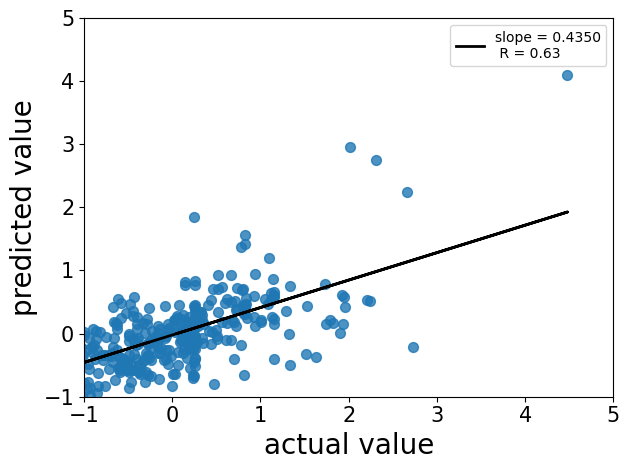

Validation data saved: results/SGD/selectivity/Ki/fold1/selectivity_Ki_fold1_validation_epoch_27_data.csv

Fold 1 completed!
Best model: epoch 27, val_loss: 0.2641
Checkpoint saved at: results/SGD/selectivity/Ki/fold1

Processing Fold 2
Loading datasets for selectivity Ki fold 2
Label Normalizer fitted: mean=0.5751, std=0.4437
Normalizer saved: results/SGD/selectivity/Ki/fold2/normalizer.pkl
Train samples: 1313
Validation samples: 146
Test samples: 365
Running EPOCH 1
train avg_loss is:  0.32037406575956495
val avg_loss is:  0.21775153060812227
  -> Best model saved! (epoch 1, val_loss: 0.2178)


Running EPOCH 2
train avg_loss is:  0.3075546722490053
val avg_loss is:  0.207262124335854
  -> Best model saved! (epoch 2, val_loss: 0.2073)


Running EPOCH 3
train avg_loss is:  0.310586647989922
val avg_loss is:  0.20170845303462
  -> Best model saved! (epoch 3, val_loss: 0.2017)


Running EPOCH 4
train avg_loss is:  0.30688233023439665
val avg_loss is:  0.1940204082280266
  -> Best model s

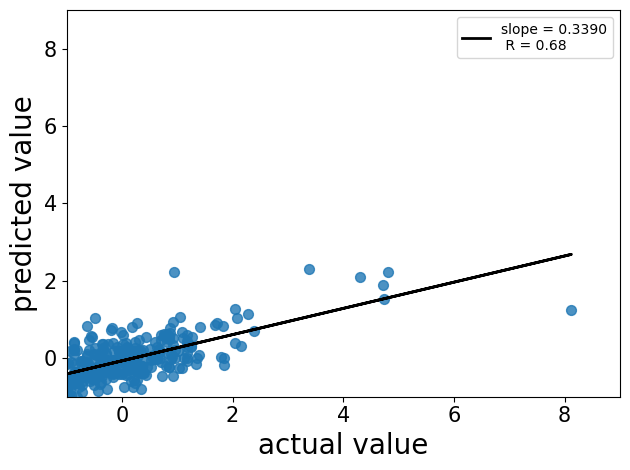

Validation data saved: results/SGD/selectivity/Ki/fold2/selectivity_Ki_fold2_validation_epoch_16_data.csv

Fold 2 completed!
Best model: epoch 16, val_loss: 0.1729
Checkpoint saved at: results/SGD/selectivity/Ki/fold2

Processing Fold 3
Loading datasets for selectivity Ki fold 3
Label Normalizer fitted: mean=0.5652, std=0.4267
Normalizer saved: results/SGD/selectivity/Ki/fold3/normalizer.pkl
Train samples: 1313
Validation samples: 146
Test samples: 365
Running EPOCH 1
train avg_loss is:  0.3882196698542706
val avg_loss is:  0.42465046096881004
  -> Best model saved! (epoch 1, val_loss: 0.4247)


Running EPOCH 2
train avg_loss is:  0.3284722756462043
val avg_loss is:  0.41870984860146593
  -> Best model saved! (epoch 2, val_loss: 0.4187)


Running EPOCH 3
train avg_loss is:  0.325764074372164
val avg_loss is:  0.41636578627171866
  -> Best model saved! (epoch 3, val_loss: 0.4164)


Running EPOCH 4
train avg_loss is:  0.3113873125164409
val avg_loss is:  0.415742735491127
  -> Best model

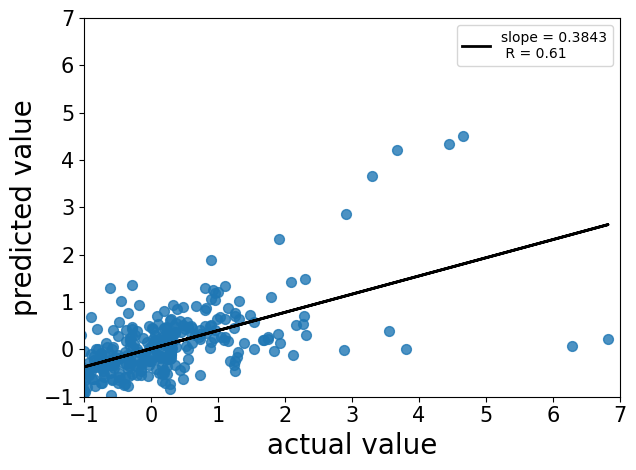

Validation data saved: results/SGD/selectivity/Ki/fold3/selectivity_Ki_fold3_validation_epoch_28_data.csv

Fold 3 completed!
Best model: epoch 28, val_loss: 0.3450
Checkpoint saved at: results/SGD/selectivity/Ki/fold3

Processing Fold 4
Loading datasets for selectivity Ki fold 4
Label Normalizer fitted: mean=0.5633, std=0.4281
Normalizer saved: results/SGD/selectivity/Ki/fold4/normalizer.pkl
Train samples: 1313
Validation samples: 146
Test samples: 365
Running EPOCH 1
train avg_loss is:  0.31934171269006856
val avg_loss is:  0.4187778226037657
  -> Best model saved! (epoch 1, val_loss: 0.4188)


Running EPOCH 2
train avg_loss is:  0.3255949766287982
val avg_loss is:  0.40173882248418596
  -> Best model saved! (epoch 2, val_loss: 0.4017)


Running EPOCH 3
train avg_loss is:  0.3008796077815725
val avg_loss is:  0.3947799202525204
  -> Best model saved! (epoch 3, val_loss: 0.3948)


Running EPOCH 4
train avg_loss is:  0.3072081703945619
val avg_loss is:  0.38707050072396426
  -> Best mod

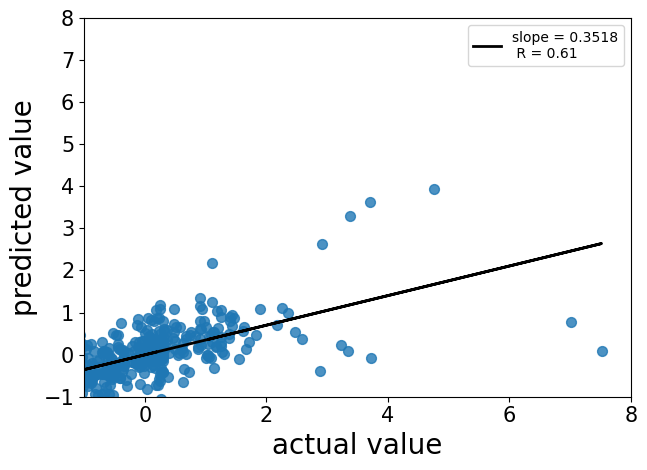

Validation data saved: results/SGD/selectivity/Ki/fold4/selectivity_Ki_fold4_validation_epoch_45_data.csv

Fold 4 completed!
Best model: epoch 45, val_loss: 0.2784
Checkpoint saved at: results/SGD/selectivity/Ki/fold4

Processing Fold 5
Loading datasets for selectivity Ki fold 5
Label Normalizer fitted: mean=0.5693, std=0.4421
Normalizer saved: results/SGD/selectivity/Ki/fold5/normalizer.pkl
Train samples: 1314
Validation samples: 146
Test samples: 364
Running EPOCH 1
train avg_loss is:  0.3810546118538809
val avg_loss is:  0.49029664663491257
  -> Best model saved! (epoch 1, val_loss: 0.4903)


Running EPOCH 2
train avg_loss is:  0.3122549580860578
val avg_loss is:  0.49208649784435643


Running EPOCH 3
train avg_loss is:  0.37424003997579675
val avg_loss is:  0.4750553863400662
  -> Best model saved! (epoch 3, val_loss: 0.4751)


Running EPOCH 4
train avg_loss is:  0.31385142897807733
val avg_loss is:  0.4818888668531432


Running EPOCH 5
train avg_loss is:  0.3003790666281421
val av

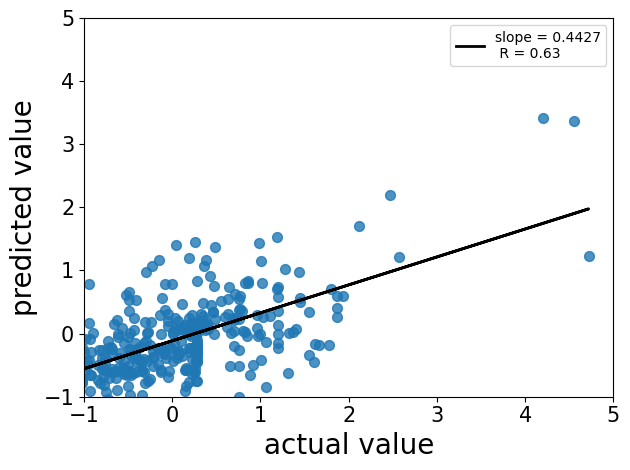

Validation data saved: results/SGD/selectivity/Ki/fold5/selectivity_Ki_fold5_validation_epoch_50_data.csv

Fold 5 completed!
Best model: epoch 50, val_loss: 0.3252
Checkpoint saved at: results/SGD/selectivity/Ki/fold5

All folds completed!

Summary metrics saved: ./results/SGD/selectivity/Ki/summary_metric.csv

Summary Metrics (Test Set):
metric     mean      std
  rmse 0.784109 0.103869
    r2 0.390840 0.021956
   pcc 0.633473 0.027009
All folds metrics saved: ./results/SGD/selectivity/Ki/all_folds_metrics.csv


In [3]:
all_fold_metrics = []

for fold_num in range(start_fold, end_fold + 1):
    print('\n' + '=' * 60)
    print(f'Processing Fold {fold_num}')
    print('=' * 60)
    
    # Fold setting
    label = f'{dataset_name}_{task_name}_fold{fold_num}'
    resultLoss = {'losses_train': [], 'losses_val': []}
    
    # dataset path
    data_dir = f'./data/{dataset_name}/{task_name}/fold{fold_num}'
    
    # Load dataset
    print(f'Loading datasets for {dataset_name} {task_name} fold {fold_num}')
    train_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_train')
    val_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_val')
    test_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_test')
    
    # aggregate y labels (only train)
    train_y_labels = []
    for data in train_data:
        train_y_labels.append(data.y.item())
    train_y_labels = np.array(train_y_labels)
    
    # Label Normalizer fit (z-score)
    normalizer = LabelNormalizer(mode='zscore')
    normalizer.fit(train_y_labels)
    print(f'Label Normalizer fitted: mean={normalizer.mean:.4f}, std={normalizer.std:.4f}')
    
    result_dir = os.path.join('results', 'SGD', dataset_name, task_name, f'fold{fold_num}')
    os.makedirs(result_dir, exist_ok=True)
    
    # save Normalizer
    normalizer_path = os.path.join(result_dir, 'normalizer.pkl')
    normalizer.save(normalizer_path)
    print(f'Normalizer saved: {normalizer_path}')
    
    # Generate DataLoader
    trainLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    valLoader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    testLoader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=False)
    
    print(f'Train samples: {len(train_data)}')
    print(f'Validation samples: {len(val_data)}')
    print(f'Test samples: {len(test_data)}')
    print('=' * 60)

    best_val_loss = float('inf')
    best_epoch = 0

    learning_rate = 0.0001
    com_model = comModel(argsCom).to(device)
    optimizer_com = torch.optim.Adam(com_model.parameters(), lr=learning_rate)
    criterion_com = torch.nn.MSELoss()

    com_model.train()
    for i in range(epochs):
        print("Running EPOCH", i+1)
        com_model.train()
        total_loss = 0
        n_batches = 0
        '''
            train
        '''
        for batch_idx, data in enumerate(trainLoader):
            encodedSmi = torch.LongTensor(data.smi).to(device)
            encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
            ecfp = torch.FloatTensor(data.ep).to(device)
            y = data.y.to(device)
            x = data.x.to(device)
            edge_index = data.edge_index.to(device)
            batch = data.batch.to(device)
            
            # y label normalization
            y_norm = torch.FloatTensor(normalizer.transform(y.cpu().numpy())).to(device)
            
            y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)
            
            loss1 = criterion_com(y_pred[0].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
            loss2 = criterion_com(y_pred[1].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
            loss3 = criterion_com(y_pred[2].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
            loss = (loss1 + loss2 + loss3) / 3
            total_loss += (loss.data)/3
            optimizer_com.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(com_model.parameters(),0.5)
            optimizer_com.step()
            n_batches+=1
            torch.cuda.empty_cache()
        avg_loss = total_loss / n_batches
        resultLoss['losses_train'].append(avg_loss)
        print('train avg_loss is: ', avg_loss.item())

        '''
            val
        '''
        com_model.eval()
        total_loss = 0.0
        n_batches = 0
        with torch.no_grad():
            for batch_idx, data in enumerate(valLoader):
                encodedSmi = torch.LongTensor(data.smi).to(device)
                encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
                ecfp = torch.FloatTensor(data.ep).to(device)
                y = data.y.to(device)
                x = data.x.to(device)
                edge_index = data.edge_index.to(device)
                batch = data.batch.to(device)
                
                # y label normalization
                y_norm = torch.FloatTensor(normalizer.transform(y.cpu().numpy())).to(device)
                
                y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch) 
                
                loss1 = criterion_com(y_pred[0].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
                loss2 = criterion_com(y_pred[1].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
                loss3 = criterion_com(y_pred[2].type(torch.DoubleTensor), y_norm.type(torch.DoubleTensor))
                loss = (loss1 + loss2 + loss3) / 3
                
                total_loss += (loss.data)/3
                
                # optimizer_com.zero_grad()
                # loss.backward()
                # torch.nn.utils.clip_grad_norm_(com_model.parameters(),0.5)
                # optimizer_com.step()
                n_batches+=1
                
            avg_loss = total_loss / n_batches
            resultLoss['losses_val'].append(avg_loss)
            val_loss_value = avg_loss.item()
            print('val avg_loss is: ', val_loss_value)
        
        # save best model checkpoint
        if val_loss_value < best_val_loss:
            best_val_loss = val_loss_value
            best_epoch = i + 1
            # remove before best checkpoint
            best_checkpoint_path = os.path.join(result_dir, 'best_model.pt')
            if os.path.exists(best_checkpoint_path):
                os.remove(best_checkpoint_path)
            # save new best checkpoint
            torch.save({
                'epoch': best_epoch,
                'model_state_dict': com_model.state_dict(),
                'optimizer_state_dict': optimizer_com.state_dict(),
                'val_loss': best_val_loss,
                'argsCom': argsCom
            }, best_checkpoint_path)
            print(f'  -> Best model saved! (epoch {best_epoch}, val_loss: {best_val_loss:.4f})')
        print('\n')

    # load best checkpoint
    best_checkpoint_path = os.path.join(result_dir, 'best_model.pt')
    if os.path.exists(best_checkpoint_path):
        print(f'Loading best model from checkpoint: {best_checkpoint_path}')
        checkpoint = torch.load(best_checkpoint_path, map_location=device, weights_only=False)
        com_model.load_state_dict(checkpoint['model_state_dict'])
        # update best epoch
        best_epoch = checkpoint['epoch']
        best_val_loss = checkpoint['val_loss']
        print(f'Best model loaded: epoch {best_epoch}, val_loss: {best_val_loss:.4f}')
    else:
        print(f'Warning: Best checkpoint not found, using last epoch model')
    
    val_data = []
    pred_data1 = []
    pred_data2 = []
    pred_data3 = []
    com_model.eval()
    for batch_idx, data in enumerate(valLoader):
        encodedSmi = torch.LongTensor(data.smi).to(device)
        encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
        ecfp = torch.FloatTensor(data.ep).to(device)
        y = data.y.to(device)
        x = data.x.to(device)
        edge_index = data.edge_index.to(device)
        batch = data.batch.to(device)
        
        # y label normalization
        y_norm = torch.FloatTensor(normalizer.transform(y.cpu().numpy())).to(device)
        
        y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)
        val_data.append(y_norm.cpu().tolist())
        pred_data1.append(y_pred[0].tolist())
        pred_data2.append(y_pred[1].tolist())
        pred_data3.append(y_pred[2].tolist()) 

    def flattened_data(data):
        fla_data = [item for sublist in data for item in sublist]
        merged_data = np.array(fla_data).flatten() 
        return merged_data

    data_ = {}
    data_['pred1'] = flattened_data(pred_data1)
    data_['pred2'] = flattened_data(pred_data2)
    data_['pred3'] = flattened_data(pred_data3)
    data_['true'] = flattened_data(val_data)

    val_data_flat = flattened_data(val_data).astype(np.float32)
    pred_data1_flat = flattened_data(pred_data1).astype(np.float32)
    pred_data2_flat = flattened_data(pred_data2).astype(np.float32)
    pred_data3_flat = flattened_data(pred_data3).astype(np.float32)

    learning_rate_weight = 0.01
    weights = torch.tensor([0.7, 0.2, 0.1], requires_grad=True, dtype=torch.float)
    optimizer_weight = torch.optim.SGD([weights], lr=learning_rate_weight)
    criterion_weight = torch.nn.MSELoss()

    val_data_tensor = torch.from_numpy(val_data_flat)
    pred_data1_tensor = torch.from_numpy(pred_data1_flat)
    pred_data2_tensor = torch.from_numpy(pred_data2_flat)
    pred_data3_tensor = torch.from_numpy(pred_data3_flat)
    for i in range(epochs):
        print("Running EPOCH", i+1)
        
        com_model.train()
        
        if weights.data.sum() > 1:
            weights.data /= weights.data.sum()
        # Compute weighted_output using torch operations, not .detach().numpy()
        weighted_output = (weights[0] * pred_data1_tensor + weights[1] * pred_data2_tensor + weights[2] * pred_data3_tensor).to(device)
        val_output = val_data_tensor.to(device)
        loss = criterion_weight(weighted_output, val_output)
        optimizer_weight.zero_grad()
        loss.backward()
        optimizer_weight.step()
        print('weight loss is: ', loss.item())
    print('\n')

    numpy_weights = weights.detach().numpy()
    weightDic = {}
    weightDic[1] = numpy_weights[0]
    weightDic[2] = numpy_weights[1]
    weightDic[3] = numpy_weights[2]
    print(weightDic)

    def calRmseMae(y, y_pred):
        yResult = {}
        ground_truth = y
        predictions = y_pred
        # calculate rmse
        squared_errors = (ground_truth - predictions) ** 2
        rmse = np.sqrt(np.mean(squared_errors))
        yResult['rmse'] = rmse
        # calculate mae
        absolute_errors = np.abs(ground_truth - predictions)
        mae = np.mean(absolute_errors)
        yResult['mae'] = mae
        return yResult

    sour_data = []
    pred_data1 = []
    pred_data2 = []
    pred_data3 = []

    com_model.eval()
    for batch_idx, data in enumerate(testLoader):
        encodedSmi = torch.LongTensor(data.smi).to(device)
        encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
        ecfp = torch.FloatTensor(data.ep).to(device)
        y = data.y.to(device)
        x = data.x.to(device)
        edge_index = data.edge_index.to(device)
        batch = data.batch.to(device)
        
        # y label normalization
        y_norm = torch.FloatTensor(normalizer.transform(y.cpu().numpy())).to(device)
        
        y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)
        sour_data.append(y_norm.cpu().tolist())
        pred_data1.append(y_pred[0].tolist())
        pred_data2.append(y_pred[1].tolist())
        pred_data3.append(y_pred[2].tolist()) 
    yPred = numpy_weights[0] * flattened_data(pred_data1) + numpy_weights[1] * flattened_data(pred_data2) + numpy_weights[2] * flattened_data(pred_data3)
    ySour = flattened_data(sour_data)
    
    if len(yPred) == 0 or len(ySour) == 0:
        print(f'Warning: Empty predictions or targets. yPred length={len(yPred)}, ySour length={len(ySour)}')
        print(f'Skipping result saving for fold {fold_num}')
        continue
    
    if len(yPred) != len(ySour):
        print(f'Warning: Length mismatch. yPred length={len(yPred)}, ySour length={len(ySour)}. Truncating to min length.')
        min_len = min(len(yPred), len(ySour))
        yPred = yPred[:min_len]
        ySour = ySour[:min_len]

    rmse = np.sqrt(mean_squared_error(ySour, yPred))
    r2 = r2_score(ySour, yPred)
    pcc = pearsonr(ySour, yPred)[0]

    fold_metrics = {
        'fold': fold_num,
        'rmse': rmse,
        'r2': r2,
        'pcc': pcc
    }
    all_fold_metrics.append(fold_metrics)
    
    print(f'Fold {fold_num} Metrics:')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  R2: {r2:.4f}')
    print(f'  PCC: {pcc:.4f}')
    print('\n')
    
    # 1. save weight (best model)
    savePath = f'{result_dir}/{label}_weight_epoch_{best_epoch}.csv'
    df_weight = pd.DataFrame(weightDic.items(), columns=['Key', 'Value'])
    df_weight.to_csv(savePath, index=False)
    print(f'Weight saved: {savePath}')
    
    # 2. save predictions.csv on each fold
    predictions_df = pd.DataFrame({
        'y_true': ySour,
        'y_pred': yPred
    })
    predictions_path = f'{result_dir}/predictions.csv'
    predictions_df.to_csv(predictions_path, index=False)
    print(f'Predictions saved: {predictions_path}')
    
    # 3. save metric.csv on each fold
    metric_df = pd.DataFrame([fold_metrics])
    metric_path = f'{result_dir}/metric.csv'
    metric_df.to_csv(metric_path, index=False)
    print(f'Metrics saved: {metric_path}')
    
    # 4. save scatter plot (best model)
    savePath = f'{result_dir}/{label}_scatter_predited_epoch_{best_epoch}_com.png'
    pltPredict_linregress(yPred, ySour, savePath)
    
    # 5. save validation data (best model)
    savePath = f'{result_dir}/{label}_validation_epoch_{best_epoch}_data.csv'
    data_as_lists = {key: data_[key].tolist() for key in data_}
    df_data = pd.DataFrame(data_as_lists)
    df_data.to_csv(savePath, index=False)
    print(f'Validation data saved: {savePath}')
    
    print(f'\nFold {fold_num} completed!')
    print(f'Best model: epoch {best_epoch}, val_loss: {best_val_loss:.4f}')
    print(f'Checkpoint saved at: {result_dir}')
    print('=' * 60)

print('\n' + '=' * 60)
print('All folds completed!')
print('=' * 60)


if len(all_fold_metrics) > 0:
    all_metrics_df = pd.DataFrame(all_fold_metrics)
    
    # compute mean, std
    summary_metrics = {
        'metric': ['rmse', 'r2', 'pcc'],
        'mean': [
            all_metrics_df['rmse'].mean(),
            all_metrics_df['r2'].mean(),
            all_metrics_df['pcc'].mean()
        ],
        'std': [
            all_metrics_df['rmse'].std(),
            all_metrics_df['r2'].std(),
            all_metrics_df['pcc'].std()
        ]
    }
    summary_df = pd.DataFrame(summary_metrics)

    summary_dir = f'./results/SGD/{dataset_name}/{task_name}'
    os.makedirs(summary_dir, exist_ok=True)
    summary_path = f'{summary_dir}/summary_metric.csv'
    summary_df.to_csv(summary_path, index=False)
    print(f'\nSummary metrics saved: {summary_path}')
    print('\nSummary Metrics (Test Set):')
    print(summary_df.to_string(index=False))

    all_metrics_path = f'{summary_dir}/all_folds_metrics.csv'
    all_metrics_df.to_csv(all_metrics_path, index=False)
    print(f'All folds metrics saved: {all_metrics_path}')